In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [212]:
#Creating Movie Recommendation by recommending MOvies on the basis of correlation between movies ratings with respect to the userid
#Reading the files from the google Drive
movies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RBM/movies.dat', sep = "::", header=None, engine='python')
users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RBM/users.dat', sep="::", header=None, engine='python')
ratings = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RBM/ratings.dat', sep="::", header=None, engine='python')

In [213]:
#Giving Column Names 
movies.columns = ["MovieID","Title","Genres"]
users.columns = ["UserID","Gender","Age","idk1","idk2"]
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]

In [214]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [215]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [216]:
#Merging ratings and movies based on MovieID
df = pd.merge(ratings,movies,on='MovieID')
df.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [217]:
#Calculating the Average of ratings
df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

In [218]:
#Calculating the NUmber of Ratings of Each Movie
df.groupby("Title")["Rating"].count().sort_values(ascending=False).head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [219]:
#Creating a rating Dataframe by merging Average and Count of Ratings
rating = pd.DataFrame(df.groupby('Title')['Rating'].mean())
rating['Number of Ratings'] = pd.DataFrame(df.groupby("Title")["Rating"].count())
rating.sort_values("Number of Ratings",ascending=False).head()

,Rating,Number of Ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672


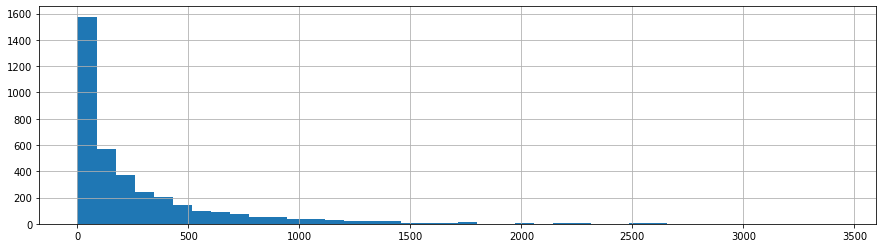

In [220]:
#plot Histogram on number of ratings
plt.figure(figsize=(15,4))
rating["Number of Ratings"].hist(bins=40)

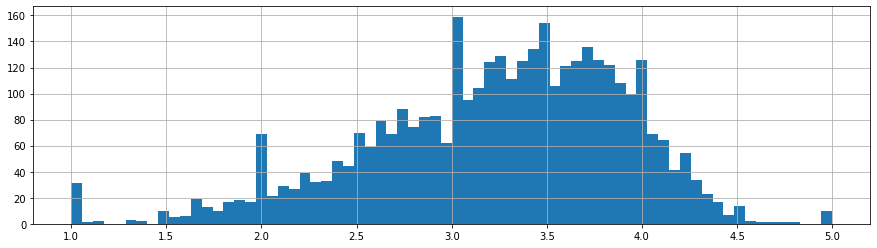

In [221]:
#plot Histogram on Rating
plt.figure(figsize=(15,4))
rating["Rating"].hist(bins=70)

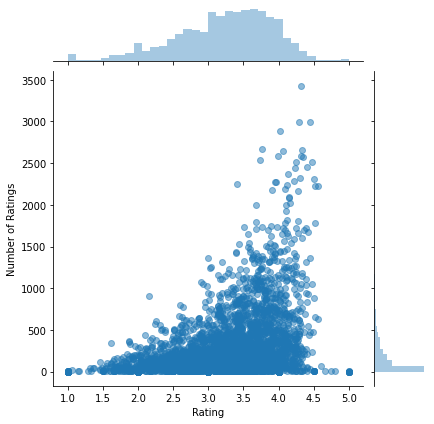

In [222]:
#Create Jointplot (SCattered Plot + Histogram )
sns.jointplot(x="Rating",y="Number of Ratings",data=rating,alpha=0.5)

In [223]:
#Creating an Pivot Table
moviePT = df.pivot_table(index="UserID",columns="Title",values="Rating").fillna(0)
moviePT.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
rating.sort_values("Number of Ratings",ascending=False).head(10)

,Rating,Number of Ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


In [225]:
American_user_ratings = moviePT["American Beauty (1999)"]
American_user_ratings.head()

UserID
1    0.0
2    4.0
3    4.0
4    0.0
5    4.0
Name: American Beauty (1999), dtype: float64

In [226]:

similar_to_AmercianBeauty = moviePT.corrwith(American_user_ratings)
similar_to_AmercianBeauty.head()

Title
$1,000,000 Duck (1971)           0.007170
'Night Mother (1986)             0.060034
'Til There Was You (1997)        0.023122
'burbs, The (1989)               0.057518
...And Justice for All (1979)    0.047492
dtype: float64

In [227]:
#Calculating Correlation with Other Movies
#Correaltion is Between -1 to 1 , 1 means highly correlated and vice-versa
corr_AmericanBeauty = pd.DataFrame(similar_to_AmercianBeauty,columns=["Correlation"])
corr_AmericanBeauty.sort_values("Correlation",ascending=False).head()

,Correlation
Title,
American Beauty (1999),1.000000
Being John Malkovich (1999),0.433136
Election (1999),0.352922
Pulp Fiction (1994),0.336978
Fight Club (1999),0.319374


In [228]:
corr_AmericanBeauty = corr_AmericanBeauty.join(rating["Number of Ratings"])
corr_AmericanBeauty.head()

,Correlation,Number of Ratings
Title,,
"$1,000,000 Duck (1971)",0.007170,37
'Night Mother (1986),0.060034,70
'Til There Was You (1997),0.023122,52
"'burbs, The (1989)",0.057518,303
...And Justice for All (1979),0.047492,199


In [229]:
#Now Filtering out movies that have more than 100 Number of Ratings
corr_AmericanBeauty[corr_AmericanBeauty["Number of Ratings"]>500].sort_values("Correlation",ascending=False).head()

,Correlation,Number of Ratings
Title,,
American Beauty (1999),1.000000,3428
Being John Malkovich (1999),0.433136,2241
Election (1999),0.352922,1522
Pulp Fiction (1994),0.336978,2171
Fight Club (1999),0.319374,1451


In [232]:
#Creating Class to Display the Correlated Movies
class CorrMovies:
  def __init__(self,Movie):
    self.Movie = Movie

  def SimilarMovies(self):
    movie_ratings = moviePT[self.Movie]
    similar_to_movie = moviePT.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns=["Correlation"])
    corr_movie = corr_movie.join(rating["Number of Ratings"])
    return corr_movie[corr_movie["Number of Ratings"]>500].sort_values("Correlation",ascending=False)


mov = CorrMovies("Home Page (1999)")
mov.SimilarMovies().head()

,Correlation,Number of Ratings
Title,,
Liar Liar (1997),0.064047,666
On the Waterfront (1954),0.059919,519
Hoop Dreams (1994),0.058615,716
Touch of Evil (1958),0.052339,514
Vertigo (1958),0.043869,905
